
# Example: Wasserstein Barycenter among 4 measures

This example has been adapted from POT Python Optimal Transport Library


In [2]:
# Authors: Laetitia Chapel & Felipe Tobar, 2024
# Based on notebook by Nicolas Courty <ncourty@irisa.fr>
# License: MIT License

import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import ot

## Data preparation

The four distributions are constructed from 4 simple images



In [3]:
this_file = os.path.realpath('__file__')
data_path = os.path.join(Path(this_file).parent, 'img')
f1 = 1 - plt.imread(os.path.join(data_path, 'grapes2.png'))[::2, ::2, 1]
f2 = 1 - plt.imread(os.path.join(data_path, 'glass.png'))[::2, ::2, 2]
f3 = 1 - plt.imread(os.path.join(data_path, 'bottle.png'))[::2, ::2, 2]
f4 = 1 - plt.imread(os.path.join(data_path, 'glasses.png'))[::2, ::2, 2]
m_x = np.min(np.array((f1.shape[0],f2.shape[0],f3.shape[0],f4.shape[0])))
m_y = np.min(np.array((f1.shape[1],f2.shape[1],f3.shape[1],f4.shape[1])))
f1 = f1[0:m_x,0:m_y]
f2 = f2[0:m_x,0:m_y]
f3 = f3[0:m_x,0:m_y]
f4 = f4[0:m_x,0:m_y]

f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)
A = np.array([f1, f2, f3, f4])

nb_images = 5

# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))

## Wasserstein Barycenter computation and visualization




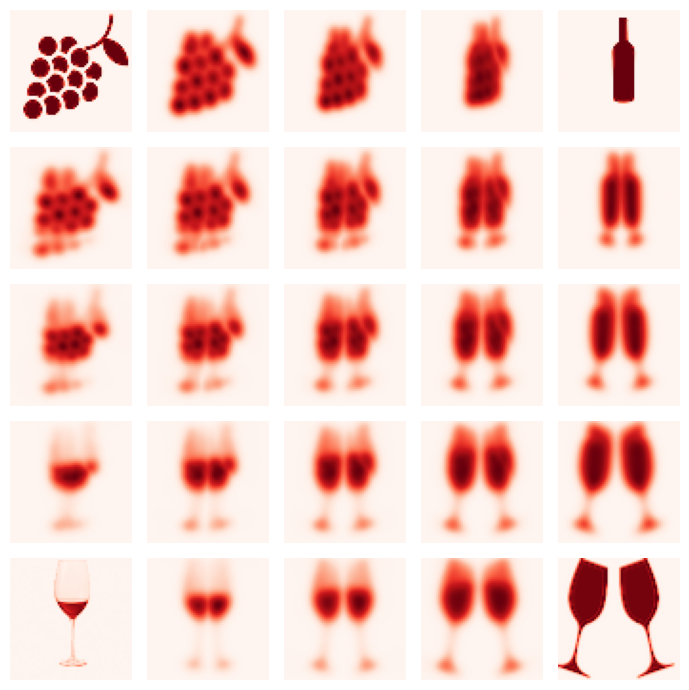

In [4]:
fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))
cm = 'Reds'
# regularization parameter
reg = 0.003
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(f1, cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(f3, cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(f2, cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(f4, cmap=cm)
        else:
            # call to barycenter computation
            axes[i, j].imshow(
                ot.bregman.convolutional_barycenter2d(A, reg, weights),
                cmap=cm
            )
        axes[i, j].axis('off')
plt.tight_layout()

#plt.savefig('../img/symboles_wine_bary.pdf',bbox_inches='tight')

## L2 Barycenter computation and visualization

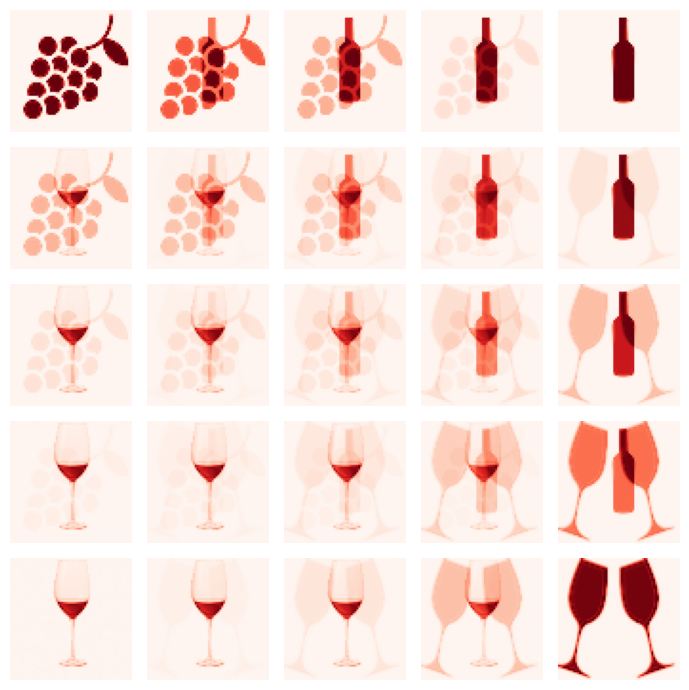

In [5]:
fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))
cm = 'Reds'
# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(f1, cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(f3, cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(f2, cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(f4, cmap=cm)
        else:
            # call to barycenter computation
            axes[i, j].imshow(
                A[0]*weights[0]+A[1]*weights[1]+A[2]*weights[2]+A[3]*weights[3],
                cmap=cm
            )
        axes[i, j].axis('off')
plt.tight_layout()

#plt.savefig('../img/symboles_wine_L2.pdf',bbox_inches='tight')